In [5]:
import sklearn
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print("Sklearn verion is {}".format(sklearn.__version__))

Sklearn verion is 1.2.2


In [7]:
# 导入数据
df = pd.read_csv('data.csv')
#  数据分析
num_size = 0.7;                              # 训练集占数据集比例
outdim = 1;                                  # 最后一列为输出
num_samples = df.shape[0];                  # 样本个数
random_indices = np.random.permutation(num_samples) # 生成随机排列的索引
df = df.iloc[random_indices, :]         # 根据随机排列的索引打乱数据集（不希望打乱时，注释该行）
num_train_s = round(num_size * num_samples);  #训练集样本个数
f_ = df.shape[1] - outdim;                   #输入特征维度

In [8]:
#  划分训练集和测试集
P_train = df.iloc[:num_train_s, :f_]
T_train = df.iloc[:num_train_s, f_:]
M = P_train.T.shape[1]

P_test = df.iloc[num_train_s:,:f_]
T_test = df.iloc[num_train_s:, f_:]
N = P_test.T.shape[1]

In [9]:
regr = make_pipeline(StandardScaler(),LinearSVR(random_state=0, tol=1e-5)) # StandardScaler()自动实现标准化
regr.fit(P_train, T_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=0, tol=1e-05))])

In [10]:
print(regr.named_steps['linearsvr'].coef_) #获取线性支持向量回归的系数
print(regr.named_steps['linearsvr'].intercept_) #获取模型中的截距

[ 5.04427001 -0.66403961  4.42932155 -3.93521696  0.0798668  -3.68758464
 -1.9896781 ]
[34.05308268]


In [11]:
score_train = regr.score(P_train, T_train)
print("在训练集上的得分：", score_train)

在训练集上的得分： 0.8399659689659882


In [12]:
score_test = regr.score(P_test, T_test)
print("在测试集上的得分：", score_test)

在测试集上的得分： 0.7154165553236849


In [13]:
# 预测
predict1 = regr.predict(P_train)
print("预测结果：", predict1)
predict2 = regr.predict(P_test)
print("预测结果：", predict2)

预测结果： [37.49405468 32.4849207  32.57635119 29.82172474 36.84374148 30.51730453
 17.29866564 45.27654094 24.63372454 40.0983631  31.41183391 24.20722213
 28.93255257 27.82656067 45.29844132 44.7592352  32.03665818 38.01848921
 41.03907524 38.17641174 42.43141796 32.77189829 30.43372028 31.89905269
 18.79218525 45.23399501 36.21738874 28.6305517  33.78126479 27.16332369
 31.63604782 26.35716191 28.16495377 27.62805495 36.18101355 39.96027204
 40.84045379 42.46526972 18.52       48.89430939 24.82961914 37.01474641
 31.53586143 39.72376241 35.7002098  26.70311364 47.32886941 23.41544741
 32.21160825 42.96860474 45.59324432 32.14573482 41.57493044 39.38179616
 33.34081019 45.05215501 32.77799337 25.44389382 37.11231624 32.11795108
 33.09831067 35.67676093 37.82085172 28.89838765 35.34395539 35.69505703
 29.16890408 26.42009305 38.37429829 38.41408615 32.70685185 27.47752107]
预测结果： [35.29466692 30.98561946 27.54510018 30.97172969 34.35009631 39.73187526
 29.11734855 25.72304016 40.23677509 4

In [14]:
predict1.shape

(72,)

In [15]:
T_train_flattened = np.squeeze(T_train)
T_train_array = T_train_flattened.to_numpy()
T_train_array.shape

(72,)

In [16]:
T_test_flattened = np.squeeze(T_test)
T_test_array = T_test_flattened.to_numpy()
T_test_array.shape

(31,)

In [17]:
M

72

In [18]:
N

31

<ipython-input-19-75e0d40eec79>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train_real', 'predict')


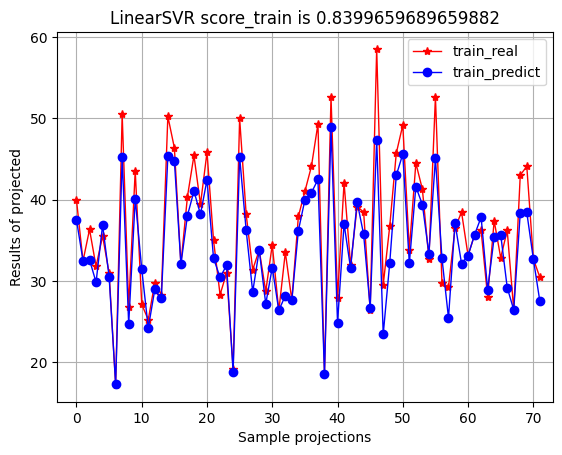

In [19]:
#  绘图
plt.plot(range(0, M), T_train_array, 'r-*',linewidth=1, label='train_real')
plt.plot(range(0, M), predict1, 'b-o',linewidth=1,label='train_predict')
plt.legend('train_real', 'predict')
plt.xlabel('Sample projections')
plt.ylabel('Results of projected')
string = "LinearSVR score_train is {}".format(score_train)
plt.title(string)
plt.xlim([-3, M+1])

plt.legend()
# 显示图形
plt.grid()
plt.show()

<ipython-input-20-71b74ec3f8d9>:4: UserWarning: The label '_' of '_' starts with '_'. It is thus excluded from the legend.
  plt.legend('test_real', 'test_predict')
<ipython-input-20-71b74ec3f8d9>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('test_real', 'test_predict')


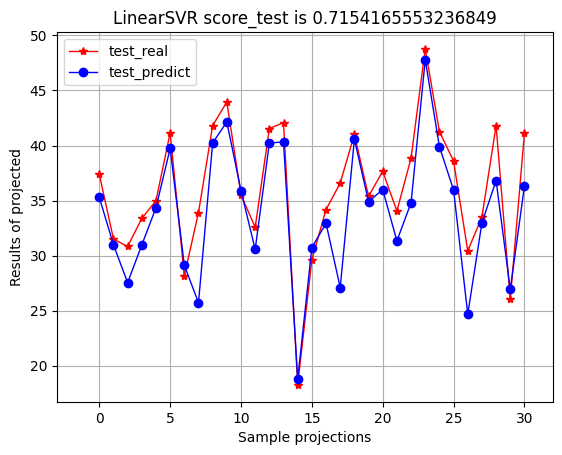

In [20]:
#  绘图
plt.plot(range(0, N), T_test_array, 'r-*',linewidth=1, label='test_real')
plt.plot(range(0, N), predict2, 'b-o',linewidth=1,label='test_predict')
plt.legend('test_real', 'test_predict')
plt.xlabel('Sample projections')
plt.ylabel('Results of projected')
string = "LinearSVR score_test is {}".format(score_test)
plt.title(string)
plt.xlim([-3, N+1])
plt.legend()
# 显示图形
plt.grid()
plt.show()

In [21]:
# R^2就等于 内置的score()函数
# 用来衡量模型拟合数据的程度，取值范围在0到1之间。R2越接近1，说明模型对数据的拟合度越高
R1 = 1 - np.linalg.norm(T_train_array - predict1) ** 2 / np.linalg.norm(T_train_array - np.mean(T_train_array)) ** 2 #训练集的R^2
R1

0.8399659689659882

In [22]:
R2 = 1 - np.linalg.norm(T_test_array - predict2) ** 2 / np.linalg.norm(T_test_array - np.mean(T_test_array)) ** 2 #测试集的R^2
R2

0.7154165553236849

In [23]:
predict1

array([37.49405468, 32.4849207 , 32.57635119, 29.82172474, 36.84374148,
       30.51730453, 17.29866564, 45.27654094, 24.63372454, 40.0983631 ,
       31.41183391, 24.20722213, 28.93255257, 27.82656067, 45.29844132,
       44.7592352 , 32.03665818, 38.01848921, 41.03907524, 38.17641174,
       42.43141796, 32.77189829, 30.43372028, 31.89905269, 18.79218525,
       45.23399501, 36.21738874, 28.6305517 , 33.78126479, 27.16332369,
       31.63604782, 26.35716191, 28.16495377, 27.62805495, 36.18101355,
       39.96027204, 40.84045379, 42.46526972, 18.52      , 48.89430939,
       24.82961914, 37.01474641, 31.53586143, 39.72376241, 35.7002098 ,
       26.70311364, 47.32886941, 23.41544741, 32.21160825, 42.96860474,
       45.59324432, 32.14573482, 41.57493044, 39.38179616, 33.34081019,
       45.05215501, 32.77799337, 25.44389382, 37.11231624, 32.11795108,
       33.09831067, 35.67676093, 37.82085172, 28.89838765, 35.34395539,
       35.69505703, 29.16890408, 26.42009305, 38.37429829, 38.41

In [24]:
T_train_array

array([39.93, 32.44, 36.32, 31.77, 35.52, 30.97, 17.19, 50.5 , 26.82,
       43.54, 27.09, 25.21, 29.77, 28.29, 50.23, 46.36, 32.04, 40.34,
       45.42, 39.4 , 45.82, 34.99, 28.29, 30.97, 19.19, 49.97, 38.19,
       31.37, 33.78, 28.7 , 34.45, 26.28, 33.51, 27.62, 37.92, 41.01,
       44.08, 49.3 , 18.52, 52.65, 27.89, 42.08, 31.9 , 39.13, 38.46,
       26.42, 58.53, 29.5 , 36.72, 45.69, 49.17, 33.78, 44.48, 41.27,
       32.71, 52.65, 29.77, 29.23, 36.46, 38.46, 33.11, 35.66, 36.19,
       28.03, 37.39, 32.84, 36.19, 26.42, 43.01, 44.08, 32.71, 30.43])

In [25]:
# MAE
# 预测值与实际值之间差值的平均绝对值。MAE越小，说明模型的预测精度越高
MAE1 = np.sum(np.abs(predict1 - T_train_array)) / M #训练集的MAE
MAE1

2.5457385023608397

In [26]:
MAE2 = np.sum(np.abs(predict2 - T_test_array)) / N #测试集的MAE
MAE2

2.32430561346146

In [27]:
# MBE
# MBE是预测值与实际值之间差值的平均值。MBE为0表示模型的预测结果没有偏差，否则表示存在偏差
MBE1 = np.sum(predict1 - T_train_array) / M #训练集的MBE
MBE1

-2.004139541387778

In [28]:
# MBE
MBE2 = np.sum(predict2 - T_test_array) / N #测试集的MBE
MBE2

-2.0741474205302635

In [29]:
# MAPE
# MAPE是预测值与实际值之间百分比差值的平均绝对值
MAPE1 = np.sum(np.abs((predict1 - T_train_array) / T_train_array)) / M #训练集的MAPE
MAPE1

0.06577031679538559

In [30]:
MAPE2 = np.sum(np.abs((predict2 - T_test_array) / T_test_array)) / N #测试集的MAPE
MAPE2

0.06503662399951832

In [31]:
# RMSE
# RMSE是预测值与实际值之间差值的平方的均值的平方根。RMSE越小，说明模型的预测精度越高
RMSE1 = np.sqrt(np.sum((predict1 - T_train_array) ** 2) / M)  # 训练集的RMSE
RMSE1

3.3824094063507104

In [32]:
RMSE2 = np.sqrt(np.sum((predict2 - T_test_array) ** 2) / M)  # 训练集的RMSE
RMSE2

2.103417550377486

In [33]:
# 绘制散点图
sz = 25
c = 'b'

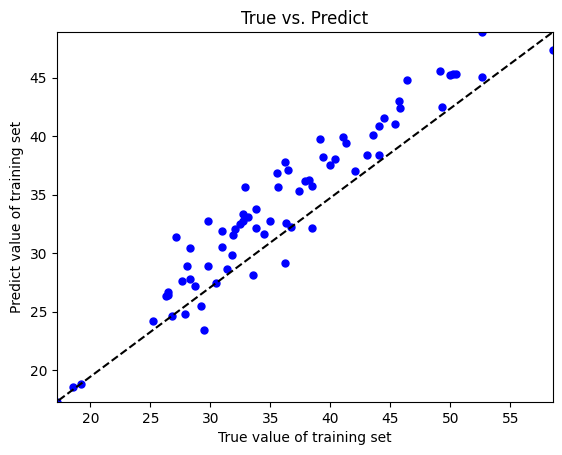

In [34]:
plt.figure()
plt.scatter(T_train_array, predict1, sz, c)
plt.plot(plt.xlim(), plt.ylim(), '--k')
plt.xlabel('True value of training set')
plt.ylabel('Predict value of training set')
plt.xlim([min(T_train_array), max(T_train_array)])
plt.ylim([min(predict1), max(predict1)])
plt.title('True vs. Predict')
plt.show()

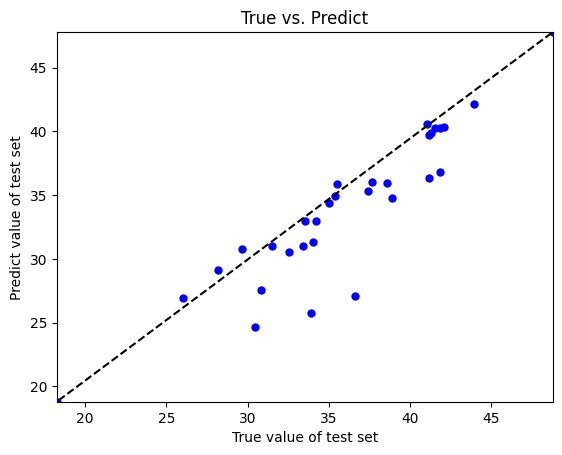

In [35]:
plt.figure()
plt.scatter(T_test_array, predict2, sz, c)
plt.plot(plt.xlim(), plt.ylim(), '--k')
plt.xlabel('True value of test set')
plt.ylabel('Predict value of test set')
plt.xlim([min(T_test_array), max(T_test_array)])
plt.ylim([min(predict2), max(predict2)])
plt.title('True vs. Predict')
plt.show()

In [36]:
print("训练集数据的R2为：{}".format(R1))
print("测试集数据的R2为：{}".format(R2))
print("训练集数据的MAPE为：{}".format(MAPE1))
print("测试集数据的MAPE为：{}".format(MAPE2))
print("训练集数据的MAE为：{}".format(MAE1))
print("测试集数据的MAE为：{}".format(MAE2))
print("训练集数据的MBE为：{}".format(MBE1))
print("测试集数据的MBE为：{}".format(MBE2))
print("训练集数据的RMSE为：{}".format(RMSE1))
print("测试集数据的RMSE为：{}".format(RMSE2))

训练集数据的R2为：0.8399659689659882
测试集数据的R2为：0.7154165553236849
训练集数据的MAPE为：0.06577031679538559
测试集数据的MAPE为：0.06503662399951832
训练集数据的MAE为：2.5457385023608397
测试集数据的MAE为：2.32430561346146
训练集数据的MBE为：-2.004139541387778
测试集数据的MBE为：-2.0741474205302635
训练集数据的RMSE为：3.3824094063507104
测试集数据的RMSE为：2.103417550377486


In [39]:
# 导入带预测的数据(未来数据)
df2 = pd.read_csv('data_predict.csv')
df2

,sym1,sym2,sym3,sym4,sym5,sym6,sym7,out1
0,273,82,105,210,9,904,680,NaN
1,163,149,191,180,12,843,746,NaN
2,162,148,191,179,16,840,743,NaN
3,162,148,190,179,19,838,741,NaN
4,154,112,144,220,10,923,658,NaN
5,147,89,115,202,9,860,829,NaN
6,152,139,178,168,18,944,695,NaN
7,145,0,227,240,6,750,853,NaN
8,152,0,237,204,6,785,892,NaN
9,304,0,140,214,6,895,722,NaN


In [50]:
V_train = df2.iloc[:num_train_s, :f_]
V_train

,sym1,sym2,sym3,sym4,sym5,sym6,sym7
0,273,82,105,210,9,904,680
1,163,149,191,180,12,843,746
2,162,148,191,179,16,840,743
3,162,148,190,179,19,838,741
4,154,112,144,220,10,923,658
5,147,89,115,202,9,860,829
6,152,139,178,168,18,944,695
7,145,0,227,240,6,750,853
8,152,0,237,204,6,785,892
9,304,0,140,214,6,895,722


In [51]:
predict3 = regr.predict(V_train)
print("预测结果：", predict3)

预测结果： [32.77189829 36.31931249 36.82158229 37.01474641 24.63372454 24.20722213
 34.80490015 27.0961465  32.70685185 35.7002098  26.9345675  28.89838765
 28.6305517  25.72304016 32.4849207  31.34057816 30.43372028 40.56233018
 42.46526972 25.44389382]


In [53]:
data = {'预测结果': predict3}
df3 = pd.DataFrame(data)
df3.to_csv('output.csv', index=False)